In [89]:
import csv
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
station_latlondes = {}
with open('ghcnd-stations.txt') as f:
    for line in f:
        line = line.split()
        station_latlondes[line[0]] = [float(line[1]), float(line[2]), ' '.join(line[4:])]

In [3]:
#           0/1     1/2  2/3     3/4   4/5              5/6          6/7
# format is station,date,measure,value,measurement flag,quality flag,source flag

In [4]:
all_prcp = []

with open('201X_PRCP.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3])  # tenths of mm
        all_prcp.append(value)

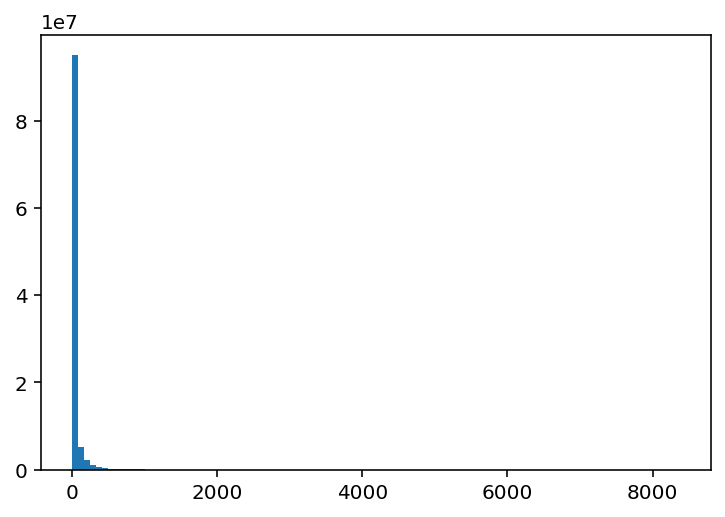

In [5]:
_ = plt.hist(all_prcp, bins=100)

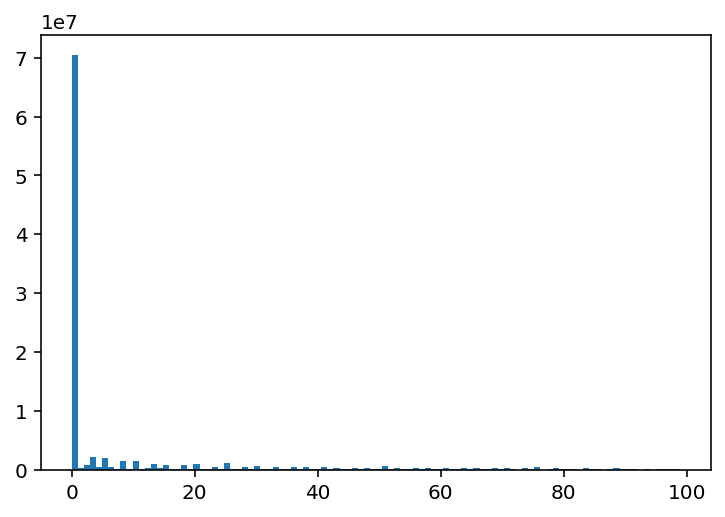

In [8]:
# Just values less than a centimeter
_ = plt.hist([value for value in all_prcp if value < 100], bins=100)

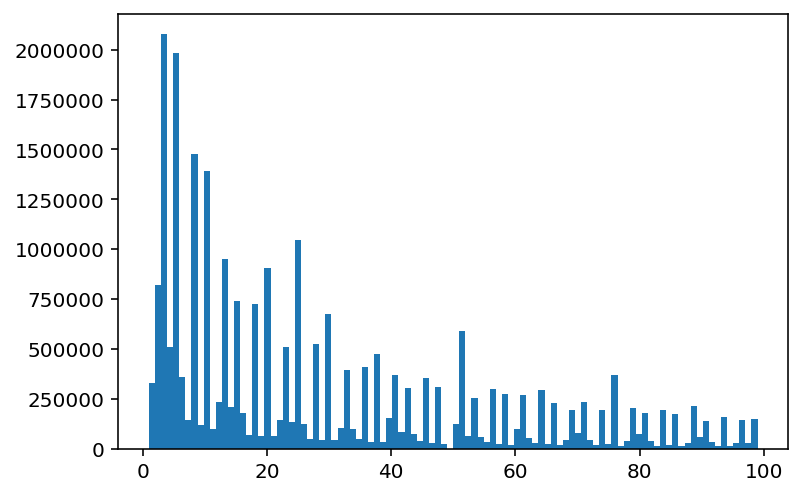

In [7]:
# Just values > 0 and less than a centimeter
_ = plt.hist([value for value in all_prcp if 0 < value < 100], bins=100)

In [ ]:
# According to https://weatherins.com/rain-guidelines/
# a quarter-inch of rain is substantial,
# which is 64 tenths of a mm.
# So let's say, I don't know, maybe 1 mm doesn't count as rain yet.

In [9]:
del all_prcp

In [10]:
# Precipitation
station_prcp = {}

with open('201X_PRCP.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3])  # tenths of mm
        station_prcp.setdefault(line[0], []).append(value)

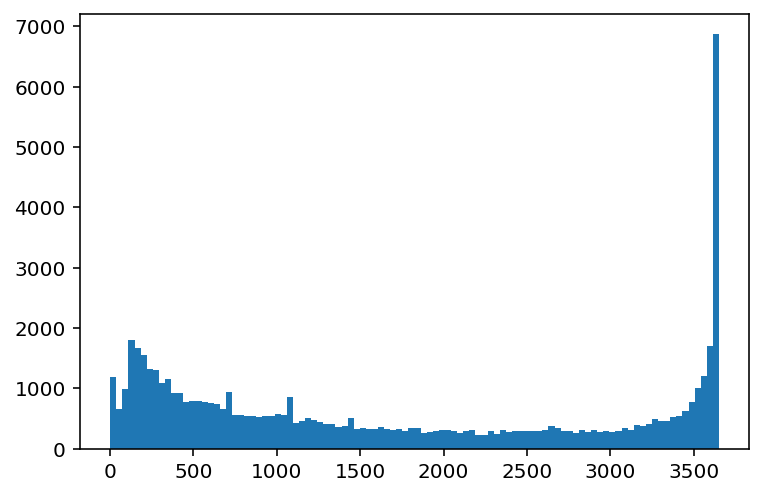

In [12]:
_ = plt.hist([len(values) for values in station_prcp.values()], bins=100)
# Some stations report more than once per day, but let's ignore that.

In [13]:
min_count = 500

In [14]:
print('total stations')
print(len(station_prcp))
low_stations = [station for station, values in station_prcp.items()
                if len(values) < min_count]
print('low-data stations')
print(len(low_stations))

total stations
60504
low-data stations
15841


In [15]:
for station in low_stations:
    del station_prcp[station]

print('remaining')
print(len(station_prcp))

remaining
44663


In [16]:
# Rate of more than 1 mm precipitation measurements
station_prcp_rate = {station: sum(value > 10 for value in values) / len(values)
                     for station, values in station_prcp.items()}

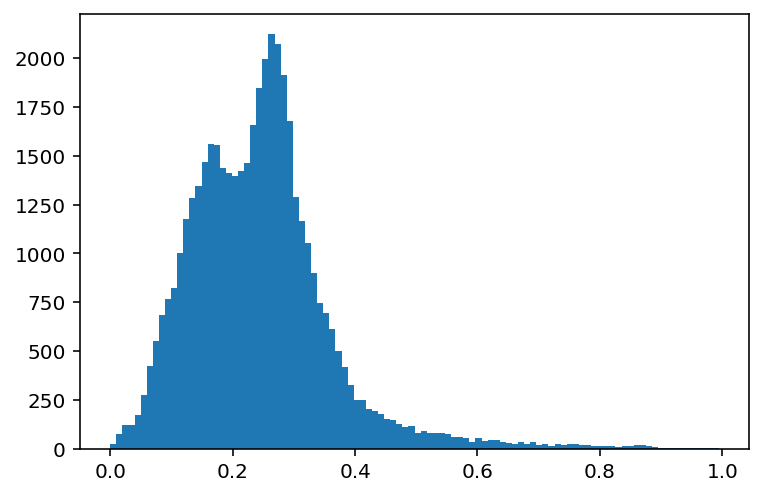

In [17]:
_ = plt.hist(list(station_prcp_rate.values()), bins=100)

In [18]:
del station_prcp

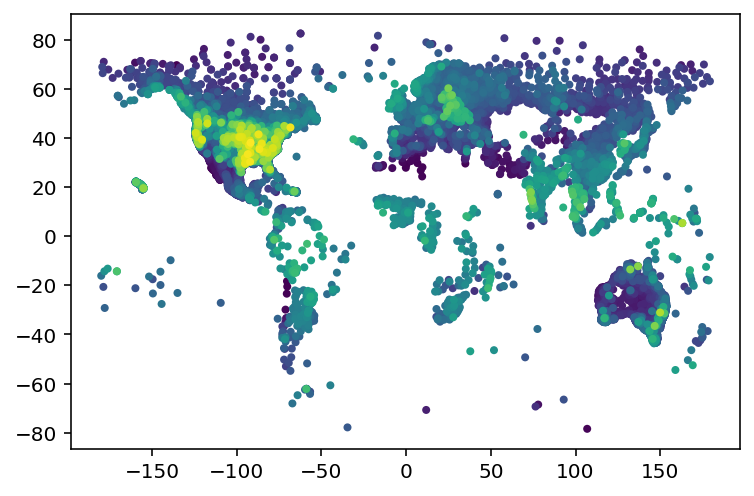

In [22]:
results = list(station_prcp_rate.items())
results.sort(key=lambda line: line[1])  # high-precipitation places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[line[1] for line in results],
            marker='.')

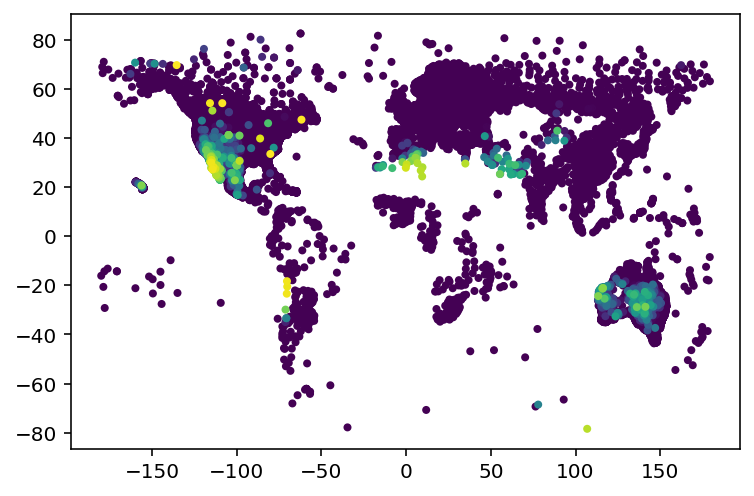

In [27]:
# NOT TOO WET
results = list(station_prcp_rate.items())
results.sort(key=lambda line: -line[1])  # low-precipitation places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[1 - line[1] if line[1] < 1/12 else 11/12 for line in results],
            marker='.')

In [29]:
# Min temperature
station_tmin = {}

with open('201X_TMIN.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3])  # tenths of degree Celsius
        station_tmin.setdefault(line[0], []).append(value)

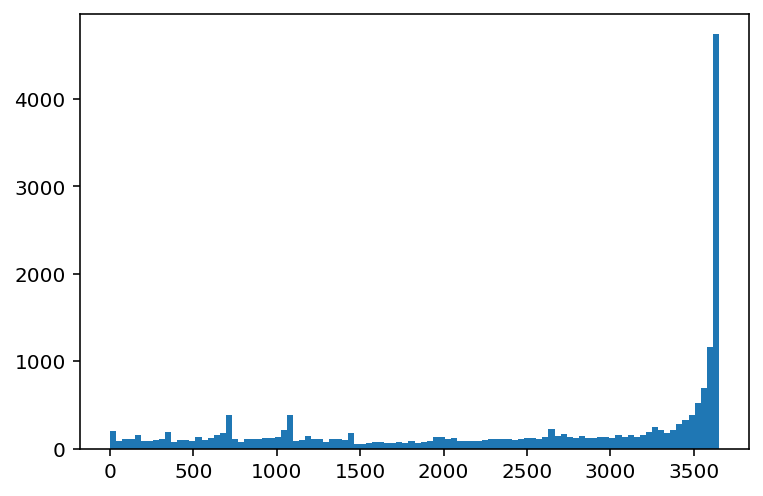

In [30]:
_ = plt.hist([len(values) for values in station_tmin.values()], bins=100)

In [31]:
print('total stations')
print(len(station_tmin))
low_stations = [station for station, values in station_tmin.items()
                if len(values) < min_count]
print('low-data stations')
print(len(low_stations))

total stations
19725
low-data stations
1578


In [32]:
for station in low_stations:
    del station_tmin[station]

print('remaining')
print(len(station_tmin))

remaining
18147


In [33]:
# Rate of min temp less than zero
station_cold_rate = {station: sum(value < 0 for value in values) / len(values)
                     for station, values in station_tmin.items()}

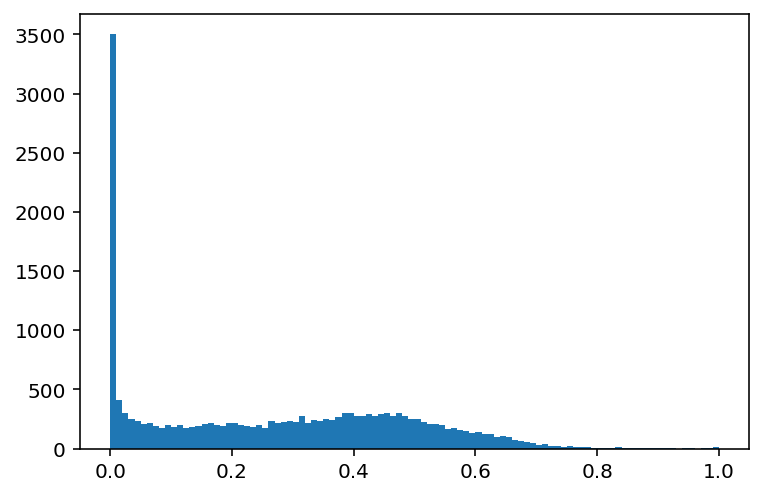

In [34]:
_ = plt.hist(list(station_cold_rate.values()), bins=100)

In [35]:
del station_tmin

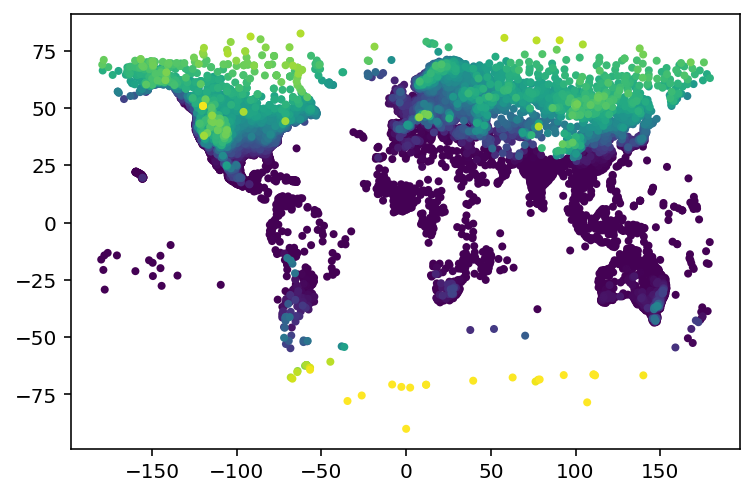

In [37]:
results = list(station_cold_rate.items())
results.sort(key=lambda line: line[1])  # cold places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[line[1] for line in results],
            marker='.')

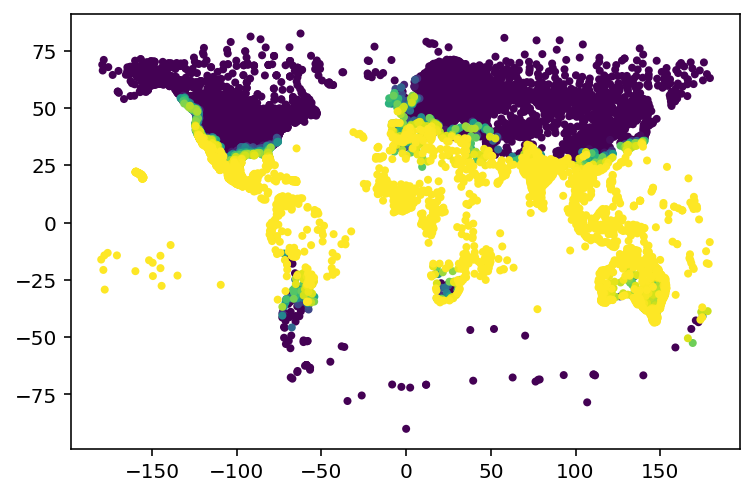

In [39]:
# NOT TOO COLD
results = list(station_cold_rate.items())
results.sort(key=lambda line: -line[1])  # not-cold places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[1 - line[1] if line[1] < 1/12 else 11/12 for line in results],
            marker='.')

In [40]:
# Max temperature
station_tmax = {}

with open('201X_TMAX.csv') as f:
    reader = csv.reader(f)
    for line in reader:
        if line[5] != '':
            continue  # skip quality problems
        value = int(line[3])  # tenths of degree Celsius
        station_tmax.setdefault(line[0], []).append(value)

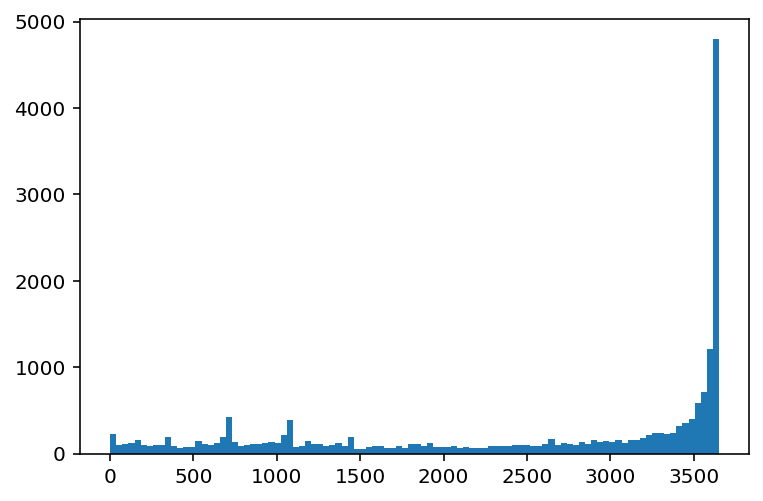

In [41]:
_ = plt.hist([len(values) for values in station_tmax.values()], bins=100)

In [42]:
print('total stations')
print(len(station_tmax))
low_stations = [station for station, values in station_tmax.items()
                if len(values) < min_count]
print('low-data stations')
print(len(low_stations))

total stations
19717
low-data stations
1555


In [43]:
for station in low_stations:
    del station_tmax[station]

print('remaining')
print(len(station_tmax))

remaining
18162


In [44]:
# Rate of max temp greater than 27
station_hot_rate = {station: sum(value > 270 for value in values) / len(values)
                     for station, values in station_tmax.items()}

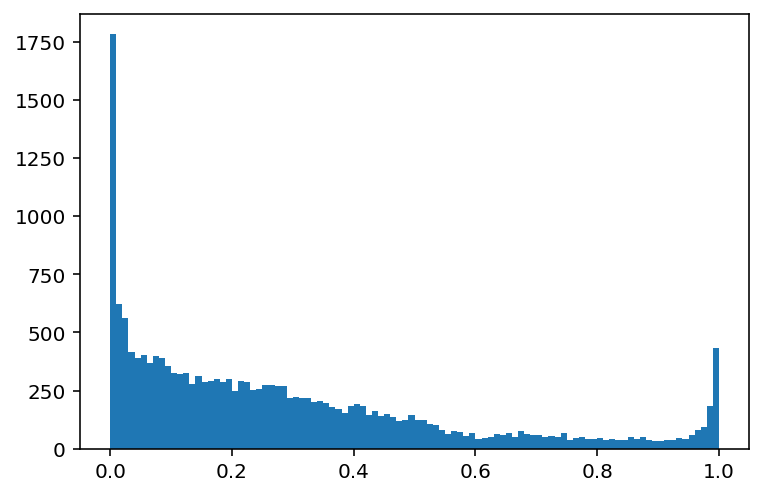

In [45]:
_ = plt.hist(list(station_hot_rate.values()), bins=100)

In [46]:
del station_tmax

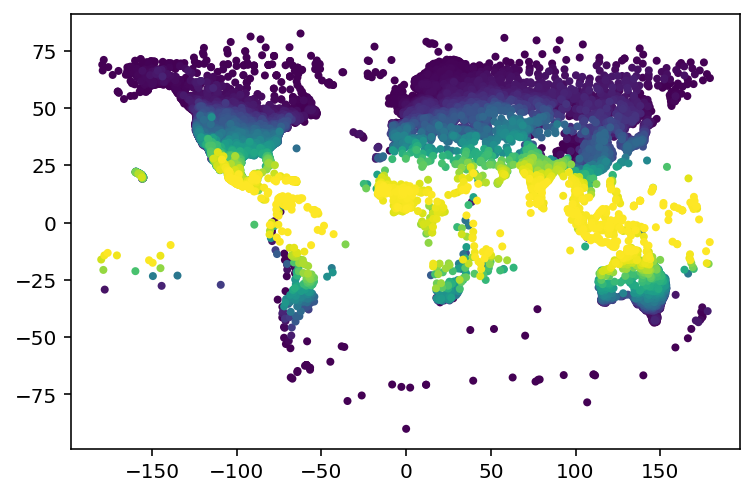

In [47]:
results = list(station_hot_rate.items())
results.sort(key=lambda line: line[1])  # hot places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[line[1] for line in results],
            marker='.')

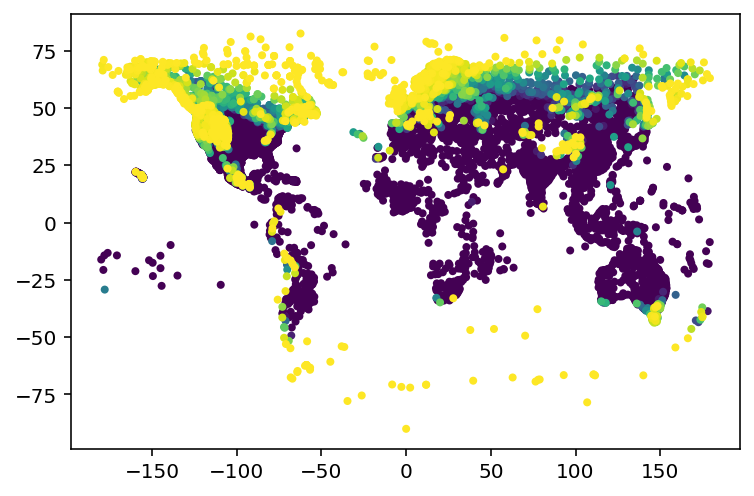

In [48]:
# NOT TOO HOT
results = list(station_hot_rate.items())
results.sort(key=lambda line: -line[1])  # not-hot places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[1 - line[1] if line[1] < 1/12 else 11/12 for line in results],
            marker='.')

In [51]:
station_bad_score = {}
for station, prcp_rate in station_prcp_rate.items():
    if station in station_cold_rate and station in station_hot_rate:
        cold_rate = station_cold_rate[station]
        hot_rate = station_hot_rate[station]
        station_bad_score[station] = prcp_rate + cold_rate + hot_rate

In [52]:
len(station_bad_score)

15686

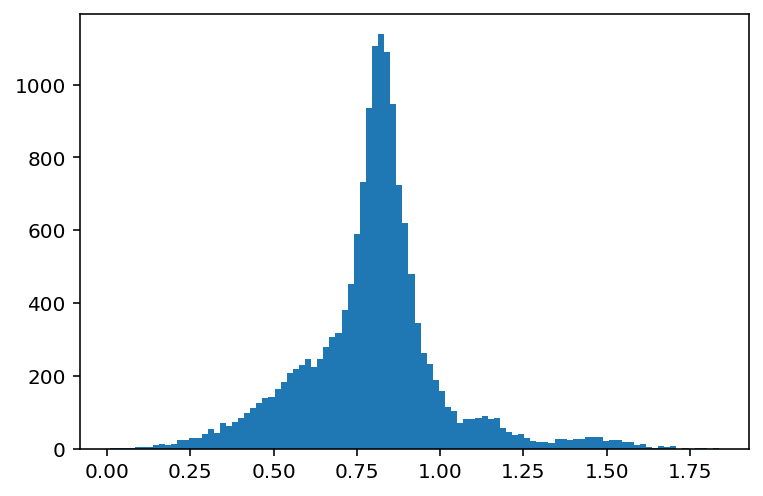

In [54]:
_ = plt.hist(list(station_bad_score.values()), bins=100)

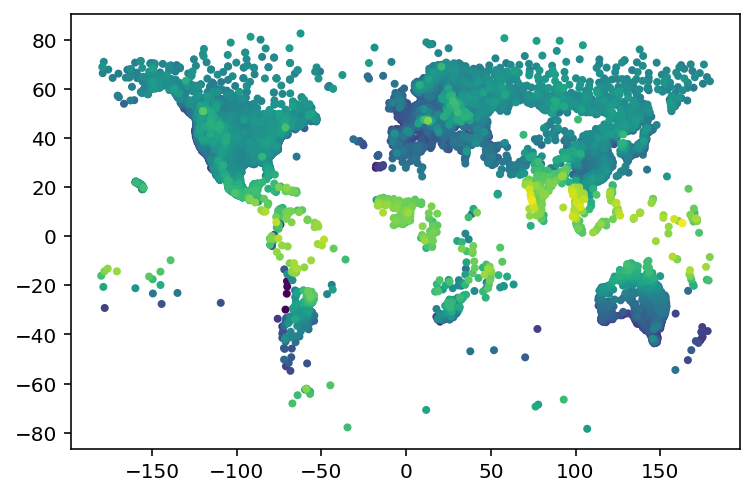

In [53]:
results = list(station_bad_score.items())
results.sort(key=lambda line: line[1])  # bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[line[1] for line in results],
            marker='.')

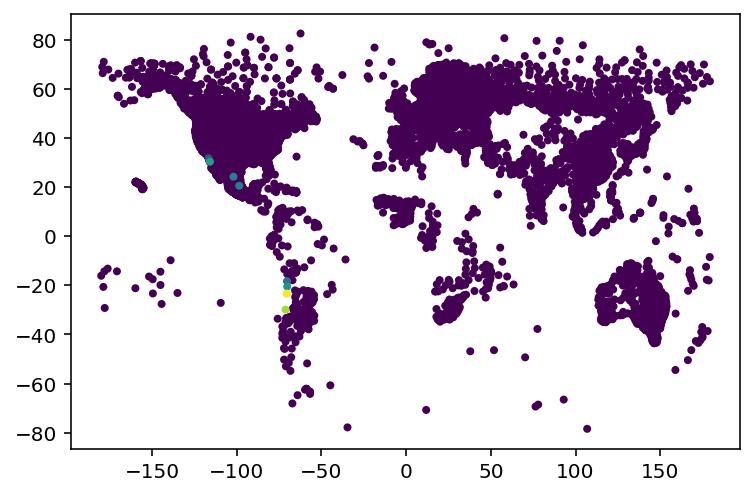

In [55]:
# NOT TOO BAD
results = list(station_bad_score.items())
results.sort(key=lambda line: -line[1])  # not-bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[1 - line[1] if line[1] < 1/12 else 11/12 for line in results],
            marker='.')

In [56]:
results[-3:]

[('MXN00002023', 0.041191960655229835),
 ('CI000085488', 0.01951381645524598),
 ('CI000085442', 0.009128306495011798)]

In [57]:
# Oh interesting; this finds Cerro Moreno, Chile
# which has nice temperatures, but is just like a straight-up desert too.
# Need to better define the "right" amount of precipitation...

In [58]:
station_bad_score = {}
for station, prcp_rate in station_prcp_rate.items():
    if station in station_cold_rate and station in station_hot_rate:
        prcp_score = abs(prcp_rate - 1/12)
        cold_rate = station_cold_rate[station]
        hot_rate = station_hot_rate[station]
        station_bad_score[station] = prcp_score + cold_rate + hot_rate

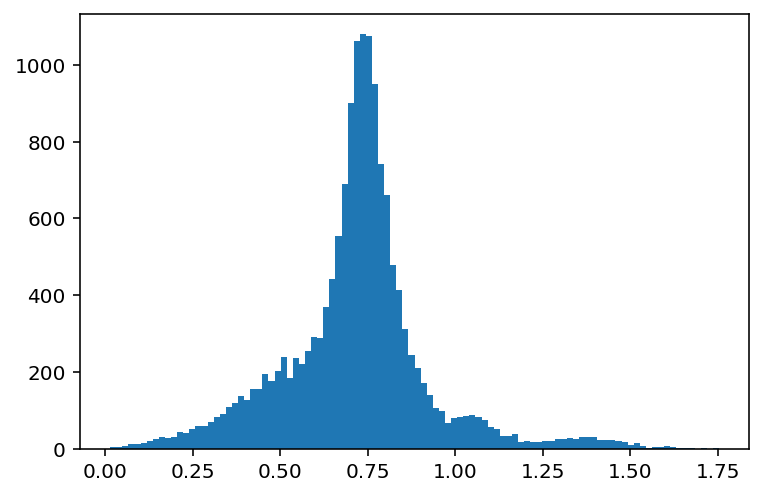

In [59]:
_ = plt.hist(list(station_bad_score.values()), bins=100)

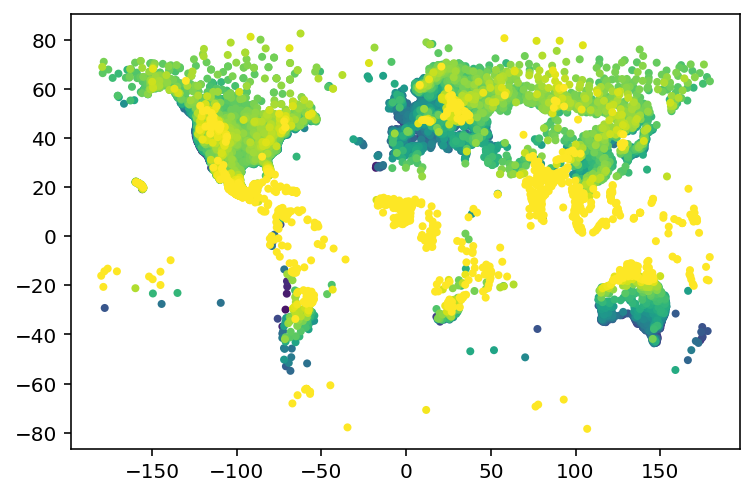

In [60]:
results = list(station_bad_score.items())
results.sort(key=lambda line: line[1])  # bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[min(line[1], 1) for line in results],
            marker='.')

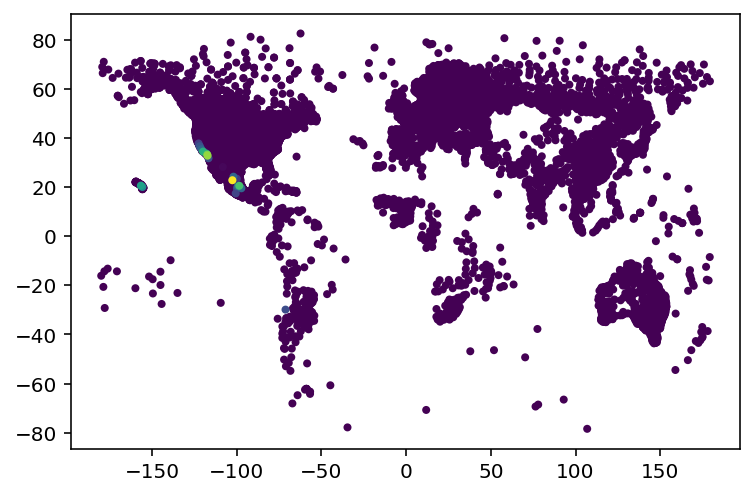

In [61]:
# NOT TOO BAD
results = list(station_bad_score.items())
results.sort(key=lambda line: -line[1])  # not-bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[1 - line[1] if line[1] < 1/12 else 11/12 for line in results],
            marker='.')

In [64]:
for result in results[-10:]:
    print(result)
    print(station_latlondes[result[0]])

('MXN00030178', 0.06069958847736627)
[19.4833, -97.25, 'TENEXTEPEC']
('MXN00013064', 0.05849978341435241)
[20.2833, -99.4, 'CHAPANTONGO']
('USC00515260', 0.051156604944422944)
[20.0131, -155.6686, 'HI LALAMILO FLD OF 191.1']
('USC00046175', 0.04637723068185359)
[33.6031, -117.8836, 'CA NEWPORT BEACH HARBOR HCN']
('USC00512558', 0.04450600609818487)
[20.5569, -156.575, 'HI KAHOOLAWE 499.6']
('USW00053152', 0.04005400084213835)
[34.4142, -119.8797, 'CA SANTA BARBARA 11 W CRN 74505']
('MXN00030359', 0.03480647024841132)
[20.5, -98.5, 'PALO BENDITO']
('USC00046377', 0.02884255848107103)
[33.2097, -117.395, 'CA OCEANSIDE MARINA']
('USC00047741', 0.02585203503707686)
[32.7653, -117.2314, 'CA SAN DIEGO SEAWORLD']
('MXN00032031', 0.014946943920972408)
[22.7667, -102.5667, 'LA BUFA (OBS)']


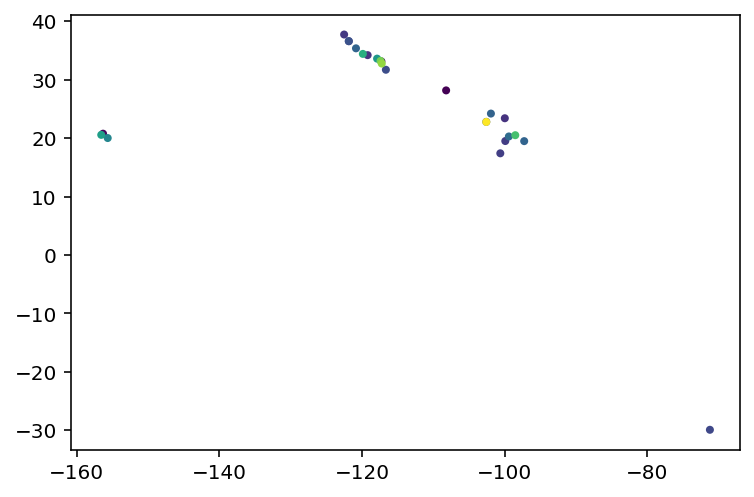

In [66]:
# ONLY NOT TOO BAD
results = list(station_bad_score.items())
results.sort(key=lambda line: -line[1])  # not-bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results if line[1] < 1/12],
            [station_latlondes[line[0]][0] for line in results if line[1] < 1/12],
            c=[1 - line[1] for line in results if line[1] < 1/12],
            marker='.')

In [ ]:
# seriously

In [75]:
1/10 - 1/12

0.016666666666666677

In [76]:
1/12 - 1/14

0.011904761904761904

In [67]:
# Let's allow a little bit more range of acceptable precipitation days...
def score_for_prcp_rate(number):
    if number < 1/14:
        return 1/14 - number
    if number > 1/10:
        return number - 1/10
    return 0

station_bad_score = {}
for station, prcp_rate in station_prcp_rate.items():
    if station in station_cold_rate and station in station_hot_rate:
        prcp_score = score_for_prcp_rate(prcp_rate)
        cold_rate = station_cold_rate[station]
        hot_rate = station_hot_rate[station]
        station_bad_score[station] = prcp_score + cold_rate + hot_rate

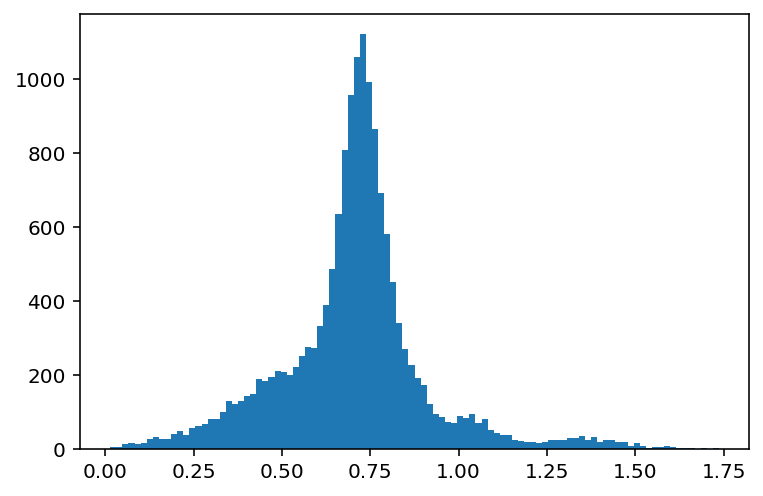

In [68]:
_ = plt.hist(list(station_bad_score.values()), bins=100)

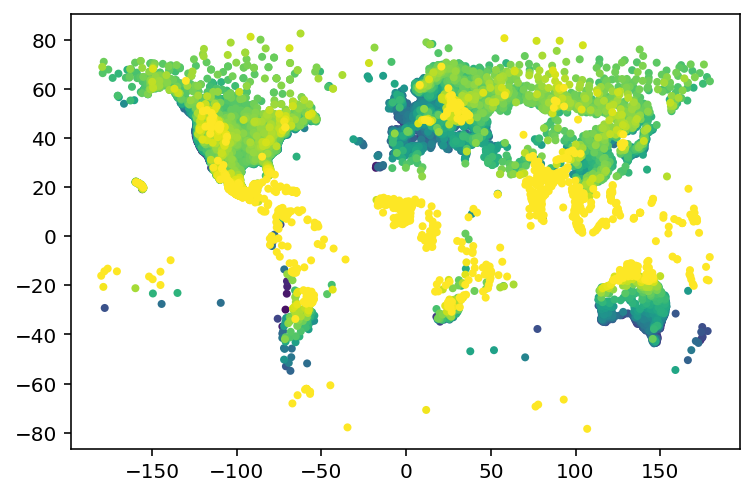

In [69]:
results = list(station_bad_score.items())
results.sort(key=lambda line: line[1])  # bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[min(line[1], 1) for line in results],
            marker='.')

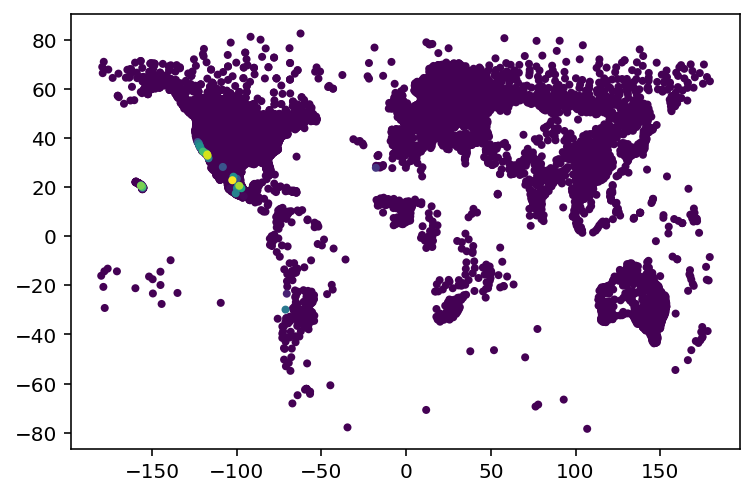

In [70]:
# NOT TOO BAD
results = list(station_bad_score.items())
results.sort(key=lambda line: -line[1])  # not-bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[1 - line[1] if line[1] < 1/12 else 11/12 for line in results],
            marker='.')

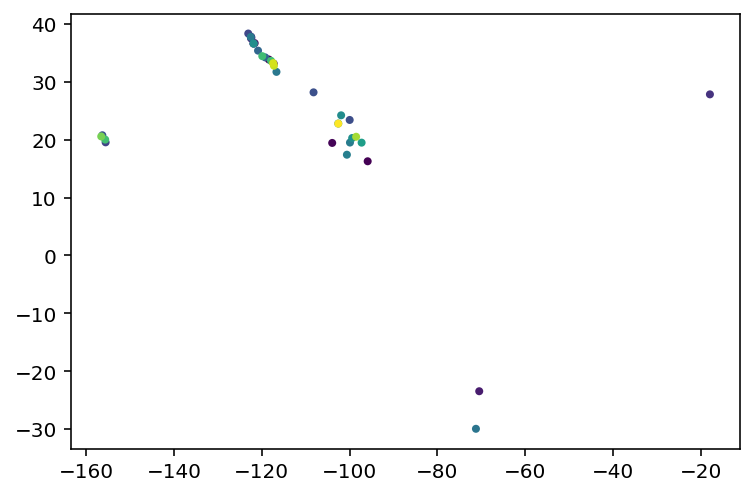

In [71]:
# ONLY NOT TOO BAD
results = list(station_bad_score.items())
results.sort(key=lambda line: -line[1])  # not-bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results if line[1] < 1/12],
            [station_latlondes[line[0]][0] for line in results if line[1] < 1/12],
            c=[1 - line[1] for line in results if line[1] < 1/12],
            marker='.')

In [72]:
for result in results[-10:]:
    print(result)
    print(station_latlondes[result[0]])

('MXN00013064', 0.048162230671736375)
[20.2833, -99.4, 'CHAPANTONGO']
('MXN00030178', 0.04403292181069959)
[19.4833, -97.25, 'TENEXTEPEC']
('USW00053152', 0.034995866629925605)
[34.4142, -119.8797, 'CA SANTA BARBARA 11 W CRN 74505']
('USC00515260', 0.03448993827775627)
[20.0131, -155.6686, 'HI LALAMILO FLD OF 191.1']
('USC00046175', 0.03447246877709169)
[33.6031, -117.8836, 'CA NEWPORT BEACH HARBOR HCN']
('USC00512558', 0.027839339431518194)
[20.5569, -156.575, 'HI KAHOOLAWE 499.6']
('MXN00030359', 0.022901708343649414)
[20.5, -98.5, 'PALO BENDITO']
('USC00047741', 0.019464720194647202)
[32.7653, -117.2314, 'CA SAN DIEGO SEAWORLD']
('USC00046377', 0.018111964873765093)
[33.2097, -117.395, 'CA OCEANSIDE MARINA']
('MXN00032031', 0.01373039890880696)
[22.7667, -102.5667, 'LA BUFA (OBS)']


In [78]:
# Maybe I'm trying to keep it too dry...
def score_for_prcp_rate(number):
    if number < 1/10:
        return 2 * (1/10 - number)
    if number > 1/8:
        return 2 * (number - 1/8)
    return 0

station_bad_score = {}
for station, prcp_rate in station_prcp_rate.items():
    if station in station_cold_rate and station in station_hot_rate:
        prcp_score = score_for_prcp_rate(prcp_rate)
        cold_rate = station_cold_rate[station]
        hot_rate = station_hot_rate[station]
        station_bad_score[station] = prcp_score + cold_rate + hot_rate

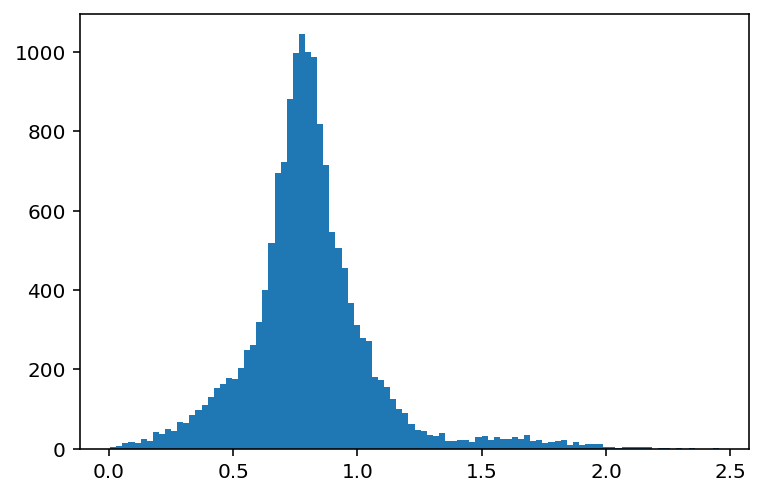

In [79]:
_ = plt.hist(list(station_bad_score.values()), bins=100)

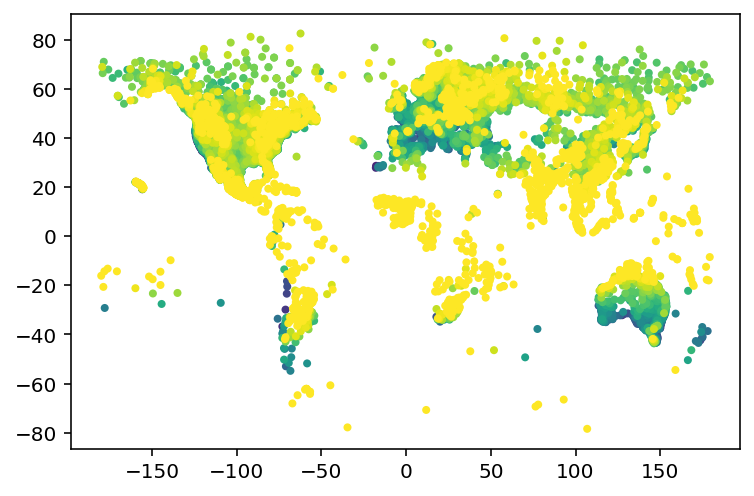

In [80]:
results = list(station_bad_score.items())
results.sort(key=lambda line: line[1])  # bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[min(line[1], 1) for line in results],
            marker='.')

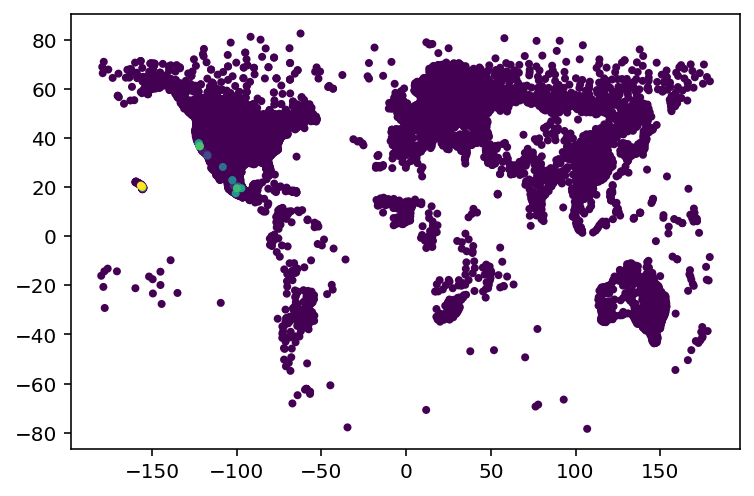

In [81]:
# NOT TOO BAD
results = list(station_bad_score.items())
results.sort(key=lambda line: -line[1])  # not-bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[1 - line[1] if line[1] < 1/12 else 11/12 for line in results],
            marker='.')

In [82]:
for result in results[-10:]:
    print(result)
    print(station_latlondes[result[0]])

('USW00023234', 0.05148678414096916)
[37.6197, -122.3647, 'CA SAN FRANCISCO INTL AP 72494']
('MXN00032031', 0.049496822266471216)
[22.7667, -102.5667, 'LA BUFA (OBS)']
('MXN00012009', 0.0422743911422387)
[17.4, -100.6, 'ARROYO FRIO']
('USC00047767', 0.03936365153756547)
[37.7281, -122.5053, 'CA SAN FRANCISCO OCEANSIDE']
('MXN00030178', 0.0380658436213992)
[19.4833, -97.25, 'TENEXTEPEC']
('MXN00015388', 0.03026439955654483)
[19.5, -99.9, 'YEBUCIVI']
('USW00023259', 0.02781481573291979)
[36.5881, -121.8453, 'CA MONTEREY PENINSUL AP']
('USC00045802', 0.027744385009228024)
[36.5928, -121.8556, 'CA MONTEREY WFO']
('USC00515260', 0.010342598577892695)
[20.0131, -155.6686, 'HI LALAMILO FLD OF 191.1']
('USC00512558', 0.00558659217877095)
[20.5569, -156.575, 'HI KAHOOLAWE 499.6']


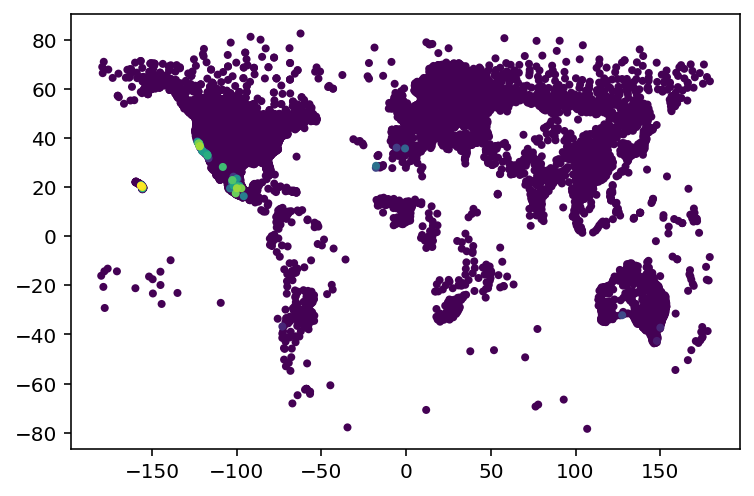

In [83]:
# NOT TOO BAD
results = list(station_bad_score.items())
results.sort(key=lambda line: -line[1])  # not-bad places last
plt.scatter([station_latlondes[line[0]][1] for line in results],
            [station_latlondes[line[0]][0] for line in results],
            c=[1 - line[1] if line[1] < 2/12 else 10/12 for line in results],
            marker='.')